In [1]:
# This necessary library used in data science 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings   # to avoid the warnings during executing the program
warnings.filterwarnings('ignore')

### To load the dataset

In [2]:
df = pd.read_csv("advertising.csv")
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


## Delete the " Unnamed : 0 " column permanently from the dataset.

In [3]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [4]:
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


### Check the null values.

In [5]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

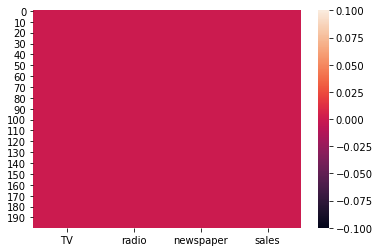

In [6]:
sns.heatmap(df.isnull())
plt.show()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


# First check the relation between input and output.
### use scatterplot  : 2D graph
###### Draw scatter plot between indepedent means input varibales TV  and Targer variable means Output means Depedent Variable SALES 

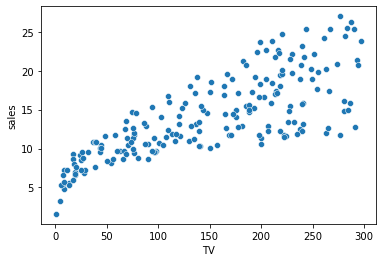

In [8]:
sns.scatterplot(data=df,x="TV",y="sales")
plt.show()

### Draw scatter plot between indepedent means input varibales ' radio ' and Targer variable means Output means Depedent Variable ' SALES '

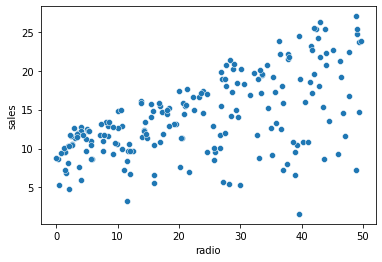

In [9]:
sns.scatterplot(data=df,x="radio",y="sales")
plt.show()

### Draw scatter plot between indepedent means input varibales ' newspaper ' and Targer variable means Output means Depedent Variable ' SALES '

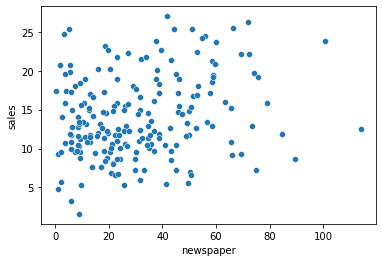

In [10]:
sns.scatterplot(data=df,x="newspaper",y="sales")
plt.show()

In [11]:
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

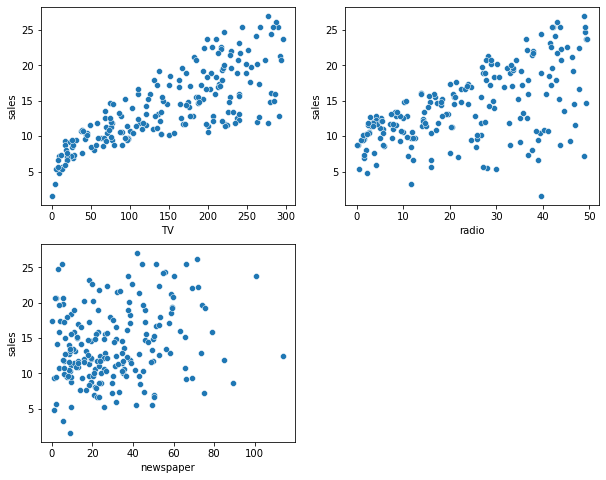

In [12]:
X = ['TV', 'radio', 'newspaper']
Y = df['sales']
plt.figure(figsize=(10,8))
for i,col in enumerate(X): # Enumerate() : return 2 values from list
    # 1. Index  2. Value at index
    plt.subplot(2,2,i+1)   # Subplot (rows,cols)
    sns.scatterplot(df[col],Y) 
plt.show()

#### Nice upword growth that means as we investment more on TV the sales is also increasing that means +ve correlation means good +ve correlation between TV(input) with sales(output)

#### see the scatter plot radio with sales : - looks better but lot of data is  scattered but scatter data overhere +ve correlation, But correlation is less as compared to TV

#### the scatter plot newspaper with sales is very bed correlation means no +ve  corr and no -ve corr means no correlation newspaper with sales because data point are scattered

## Check the correlation between Input and Ouput

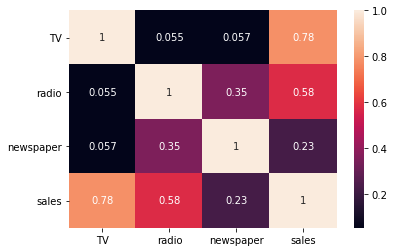

In [13]:
sns.heatmap(df.corr(),annot=True)
plt.show()

### correlation values with TV and sales=0.78 , It is very good
### correlation values with radio and sales=0.58 , It is good(ok)
### correlation values with newspaper and sales=0.23 , It is very bad

## Performing the modelling 

In [14]:
# Modeling with input : TV and output : sales
# Simple Linear Regression (SLR) : Only one input
# Select input and output from dataset
X = df[["TV"]]   # Independent variable (input) always input 2D array
Y = df['sales']  # Depedent Variable (Output) means target variable which want to predict

In [15]:
df.shape

(200, 4)

### Train Test Split

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
# Create an Object of train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size = 0.3,random_state=1)

In [18]:
X_train.shape

(140, 1)

In [19]:
X_train.head(5)

,TV
116,139.2
67,139.3
78,5.4
42,293.6
17,281.4


In [20]:
Y_train.head(20)

116    12.2
67     13.4
78      5.3
42     20.7
17     24.4
5       7.2
127     8.8
105    19.2
48     14.8
66      9.5
54     20.2
84     21.7
183    26.2
158     7.3
166     8.0
113    15.9
12      9.2
117     9.4
93     22.2
120    15.5
Name: sales, dtype: float64

## train_test_split() : inbuilt  function It is used to split dataset into training and testing , 70% data use in training and 30% data used in testing

##  Peform the linear Regression model

In [21]:
# Create a model with the help of LinearRegression
# Call LinearRegression class
from sklearn.linear_model import LinearRegression

In [22]:
# Create an Object of LinearRegression
lr = LinearRegression()

#### Train the model  : use fit()  inbuilt method of LinearRegression class

In [23]:
lr.fit(X_train,Y_train)

LinearRegression()

### To show slope means coefficient  and intercept

In [24]:
print("Slope : ",lr.coef_)
print("Intercept : ",lr.intercept_)

Slope :  [0.04812204]
Intercept :  6.923519536059554


### Test the model
      ML always gives predicted output

In [25]:
Y_pred = lr.predict(X_test)  # Y_pred = m * X_Test + b
Y_pred

array([17.06764591, 16.66823297, 11.52879892, 20.4073156 , 19.1368937 ,
       20.57093054, 14.78184893, 15.62398466, 10.32093567, 17.2890073 ,
       14.83959538, 10.25356482, 17.25532187, 12.20731971, 17.78947654,
       12.97246017, 13.26119242, 20.91259704,  8.1554438 , 17.06283371,
       11.75497252, 10.18619396,  8.13138278, 12.09182681, 12.35649804,
       15.98971218,  8.99757953, 18.89628349, 14.95027608, 18.47762173,
       18.46799732, 18.2081383 , 14.12738917, 15.11389102, 18.87703468,
       15.82128503, 17.62586159, 13.15051172, 17.35637816,  7.86671155,
        7.55391828, 11.2737521 ,  7.82340171, 16.74522823,  7.27481044,
       14.01189627, 10.68666319, 17.89534503, 16.78853807, 17.96752809,
       20.864475  , 12.84734286,  7.85708714, 15.71060434, 19.70473379,
       14.89252963, 17.43818563,  8.12657058, 18.0926454 ,  8.99276733])

In [26]:
Y_test

58     23.8
40     16.6
34      9.5
102    14.8
184    17.6
198    25.5
95     16.9
4      12.9
29     10.5
168    17.1
171    14.5
18     11.3
11     17.4
89     16.7
110    13.4
118    15.9
159    12.9
35     12.8
136     9.5
59     18.4
51     10.7
16     12.5
44      8.5
94     11.5
31     11.9
162    14.9
38     10.1
28     18.9
193    19.6
27     15.9
47     23.2
165    11.9
194    17.3
177    11.7
176    20.2
97     15.5
174    11.5
73     11.0
69     22.3
172     7.6
108     5.3
107     8.7
189     6.7
14     19.0
56      5.5
19     14.6
114    14.6
39     21.5
185    22.6
124    19.7
98     25.4
123    15.2
119     6.6
53     21.2
33     17.4
179    12.6
181    12.2
106     7.2
199    13.4
138     9.6
Name: sales, dtype: float64

In [27]:
from sklearn.metrics import mean_squared_error

In [28]:
# Show mean_squared_Error
mean_squared_error(Y_test,Y_pred) # Formula sum(Y - Y_PREDICATED) ^ 2/N

10.571057434656955

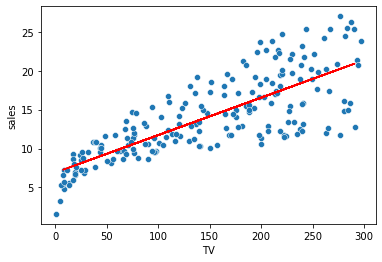

In [29]:
sns.scatterplot(data=df,x="TV",y="sales")
plt.plot(X_test,Y_pred,color='red')
plt.show()

#### R-2 Score : formual  = (TSS - RSS) / TSS  where TSS = Total Sum of Square
#### RSS = Residual Sum of Squared
### Range of R - 2 Score is 0 to 1

In [30]:
from sklearn.metrics import r2_score

In [31]:
r2_score(Y_test,Y_pred)

0.575061860494331

### OLS means Ordinary Least Squared Method

In [32]:
# Create a dictionary 
d = {"Y_test":Y_test,'Y_predict':Y_pred}

In [33]:
# Create DataFrame df1 with help of dictionary d
df1=pd.DataFrame(d)
df1

,Y_test,Y_predict
58,23.8,17.067646
40,16.6,16.668233
34,9.5,11.528799
102,14.8,20.407316
184,17.6,19.136894
198,25.5,20.570931
95,16.9,14.781849
4,12.9,15.623985
29,10.5,10.320936
168,17.1,17.289007


In [34]:
df1["TV"]=X_test
df1       # ( Y_pred = m * X_test + b )

,Y_test,Y_predict,TV
58,23.8,17.067646,210.8
40,16.6,16.668233,202.5
34,9.5,11.528799,95.7
102,14.8,20.407316,280.2
184,17.6,19.136894,253.8
198,25.5,20.570931,283.6
95,16.9,14.781849,163.3
4,12.9,15.623985,180.8
29,10.5,10.320936,70.6
168,17.1,17.289007,215.4


## Modeling with input : radio and output : sales

In [35]:
# Simple Linear Regression (SLR) : Only one input
# Select input and output from dataset
X = df[["radio"]]   # Independent variable (input) always input 2D array
Y = df['sales']  # Depedent Variable (Output) means target variable which want to predict

In [36]:
# Create an Object of train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size = 0.3,random_state=1)

### Train the model : use fit() inbuilt method of LinearRegression class

In [37]:
# Train the model
# Create Object of LinearRegression Class
lr1 = LinearRegression()

In [38]:
# Train the model
lr1.fit(X_train,Y_train)

LinearRegression()

In [39]:
# Testing the model
Y_pred = lr1.predict(X_test)

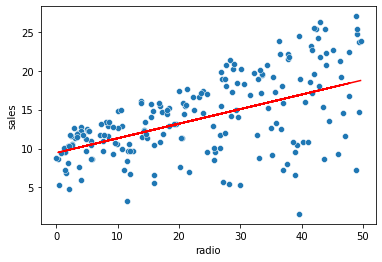

In [40]:
sns.scatterplot(data=df,x="radio",y="sales")
plt.plot(X_test,Y_pred,color='red')
plt.show()

In [41]:
print("Slope : ",lr1.coef_)
print("Intercept : ",lr1.intercept_)

Slope :  [0.1874808]
Intercept :  9.440936561425886


In [42]:
# Show mean_squared_Error
mean_squared_error(Y_test,Y_pred) # Formula sum(Y - Y_PREDICATED) ^ 2/N

14.604130559272193

In [43]:
r2_score(Y_test,Y_pred)

0.41293932917162335

## Modeling with input : newspaper and output : sales

In [44]:
# Simple Linear Regression (SLR) : Only one input
# Select input and output from dataset
X = df[["newspaper"]]   # Independent variable (input) always input 2D array
Y = df['sales']  # Depedent Variable (Output) means target variable which want to predict

In [45]:
# Create an Object of train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size = 0.3,random_state=1)

### Train the model : use fit() inbuilt method of LinearRegression class

In [46]:
# Train the model
# Create Object of LinearRegression Class
lr2 = LinearRegression()

In [47]:
# Train the model
lr2.fit(X_train,Y_train)

LinearRegression()

In [48]:
# Testing the model
Y_pred = lr2.predict(X_test)

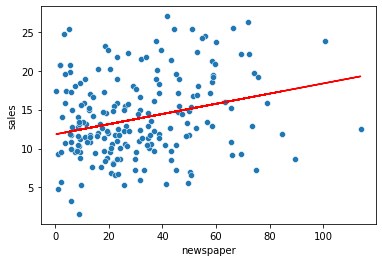

In [49]:
sns.scatterplot(data=df,x="newspaper",y="sales")
plt.plot(X_test,Y_pred,color='red')
plt.show()

In [50]:
print("Slope : ",lr2.coef_)
print("Intercept : ",lr2.intercept_)

Slope :  [0.06532045]
Intercept :  11.829668884877877


In [51]:
# Show mean_squared_Error
mean_squared_error(Y_test,Y_pred) # Formula sum(Y - Y_PREDICATED) ^ 2/N

25.49745237441493

In [52]:
r2_score(Y_test,Y_pred)

-0.024953278429509007

### slope of TV : 0.04812204  and MSE of TV  :  10.571057434656955 r2-score=0.578
### slope of radio :0.1874808 and MSE of radio : 14.604130559272193 r2-score=0.41
### slope of newspaper : 0.06532045 and MSE of newspaper :25.49745237441493 r2=-0.02

## Multiple Linear Regression (MLR) : Many input and one Output

## Equation of MLR : Y_pred = m1X1 + m2X2 +m3X3 + b

In [53]:
# Select input and output from dataset : df
X=df[["TV","radio","newspaper"]] # Output features always 2D
Y=df["sales"] # Target variable means output : 1D

In [54]:
# Create an Object of train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size = 0.3,random_state=1)

In [55]:
X_train.shape

(140, 3)

In [56]:
# Create Object of LinearRegression class
lr3 = LinearRegression()

In [57]:
# Train the model
lr3.fit(X_train,Y_train)

LinearRegression()

In [58]:
# Testing the model
Y_pred = lr3.predict(X_test)

In [59]:
# To show coefficent , slope and intercept
print("Coefficent / Slope :  ",lr3.coef_)
print("Intercept : ",lr3.intercept_)

Coefficent / Slope :   [0.04695205 0.17658644 0.00185115]
Intercept :  2.9372157346906107


In [60]:
# Show mean_squared_Error
mean_squared_error(Y_test,Y_pred) # Formula sum(Y - Y_PREDICATED) ^ 2/N

1.9289249074665724

In [61]:
r2_score(Y_test,Y_pred)

0.9224605706201435

### here r2-score is best because nearest to +1 and MSE is very low means 
### we create a successful model

# But 
### Assumptions of Linear Regression : -
        1. should not be Multicolinearity in linear regression  
           Solve this assumption .means we removed the Multicolinearity situation
        2. Assumption :  Linear relationship means There should be a linear relation
           ship. 
           when does linear regression  do best work ? 
           where got better relationship 
 
     we cannot see 3D graph on system so we have some hack(trick) , how to 
     check input and output both are related or not
     we calculate the residual (this is error means Residual =(actual output-predicted output)

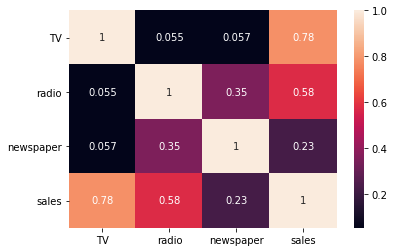

In [62]:
# Check Multicolinarity
# Visaulise corr() value
sns.heatmap(df.corr(),annot=True)
plt.show()

##### here input radio and newspaper both are corelated each other value of corr 
##### between radio and newspaper =0.35 means multicolinearity situation occurs
##### so check corr of both input radio and newspapaer with o/p and remove those 
##### input column whose corr value with o/p will be less 
##### here newspaper is less correlated with o/p sales as compared to radio with
##### sales so remove newspaper from dataset 
##### prform TV and radio with sales

In [63]:
#corr value of radio with sales :  0.58  
#corr value of newspaper with sales : 0.23
#corr value of radio and newspaper(both are input and correlated each other:0.35
#so we decided , remove newspaper because corr of radio with sales>newspaper 
#with sales
#We have input TV and radio and target sales
X=df[["TV","radio"]] #input TV and radio : 2D array
Y=df["sales"] #output which want to predict : always 1 D array

In [64]:
# Create an Object of train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size = 0.3,random_state=1)

In [65]:
X_train.head(5)

,TV,radio
116,139.2,14.3
67,139.3,14.5
78,5.4,29.9
42,293.6,27.7
17,281.4,39.6


In [66]:
X_test.head(5)

,TV,radio
58,210.8,49.6
40,202.5,22.3
34,95.7,1.4
102,280.2,10.1
184,253.8,21.3


In [67]:
Y_train.head(5)

116    12.2
67     13.4
78      5.3
42     20.7
17     24.4
Name: sales, dtype: float64

In [68]:
Y_test.head(5)

58     23.8
40     16.6
34      9.5
102    14.8
184    17.6
Name: sales, dtype: float64

In [69]:
# Create Object of LinearRegression class
lr4 = LinearRegression()

In [70]:
# Train the model
lr4.fit(X_train,Y_train)

LinearRegression()

In [71]:
# Testing the model
Y_pred = lr4.predict(X_test)

In [72]:
lr4.coef_

array([0.04697554, 0.17765046])

In [73]:
lr4.intercept_

2.9647671191401574

In [74]:
# Show mean_squared_Error
mean_squared_error(Y_test,Y_pred) # Formula sum(Y - Y_PREDICATED) ^ 2/N

1.9147050289721788

In [75]:
r2_score(Y_test,Y_pred)

0.9230321850256801

In [76]:
#1. Assumption of Linear Regression 
#2. there should be a linear relationship
#3. Assumption: if occur linear relation then next check relation is homoskedatik not a heteroskedastik
#4. Assumption of linear regression : - Residuals should be normally distributed
#  curve means data should be euqally divide on both sides.

In [77]:
# Trciks 
# Find the residuals
residuals = Y_test - Y_pred
print(residuals)

58     2.121325
40     0.161080
34     1.790963
102   -3.121584
184   -1.071115
198    1.751649
95     0.650372
4     -0.476570
29     1.376352
168   -0.175850
171    0.094861
18     1.442691
11     0.085973
89     0.085626
110   -1.628579
118    0.475105
159    0.479785
35    -4.548925
136   -1.595709
59     0.296797
51     1.313444
16    -0.151716
44    -0.209470
94     1.002953
31     0.540576
162   -0.130433
38     0.367320
28    -0.566610
193    1.338393
27    -1.310358
47     1.593306
165   -2.684544
194    0.978638
177   -0.645678
176    0.201464
97     0.118795
174   -2.516140
73     0.943990
69     1.352080
172    0.143738
108    1.648793
107    1.435349
189    0.707220
14     0.602824
56    -2.799666
19     0.469889
114   -0.352296
39     1.127387
185    1.993211
124    0.216236
98     1.311803
123    0.305838
119   -0.118500
53     1.450047
33    -1.594481
179    0.079578
181   -1.988236
106    1.106689
199   -1.995585
138    0.014138
Name: sales, dtype: float64


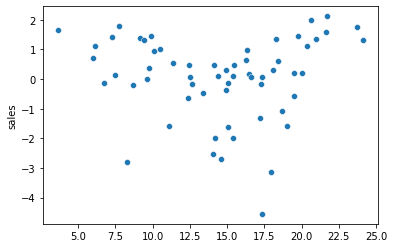

In [78]:
plt.figure()
sns.scatterplot(Y_pred,residuals)
plt.show()

### in above scatterplot, This is not a linear relation between Y_pred and residules means no relation between x=["TV","radio"] with sales o/p means this assumption is not fullfill

### normal distributed curve then use inbuilt function displot() of seaborn library ,distplot is also known as frequency graph use distplot()

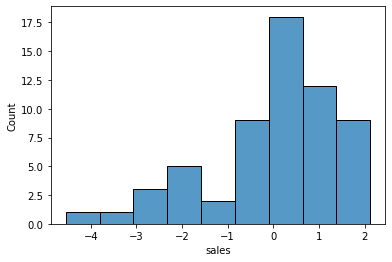

In [79]:
sns.histplot(residuals)
plt.show()

In [80]:
residuals.skew()

-1.093518163944733

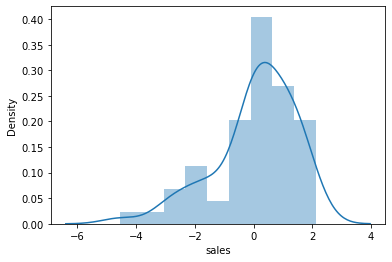

In [81]:
# Displot()
sns.distplot(residuals)
plt.show()

### In above distplot curve , -ve skewness found means no normal distributed curve found means it is a AS-symmetric curve means this assumption is not fullfill

### here we handled multicolinearity (removed multicolinearity (problem) but not working 3 assumption means no relation relationship means here create a curve relation should be HOMOSKEDAStik : means datapoints are closely each other should not by Heteroskedastic  means should not be scattered if linear relationship occurs no normal distributed curve

### Increase the degress of X means increase the power of X means independent vairable(input variable) if increasing the degree or power of independent variable then It is called polynomial Linear regression(PLR)

In [82]:
#Input : TV and radio means X1=TV X2=radio  and output Y=sales
#increase the degree of input variable=2
#equation Y=m1*TV*2+m2*TV+m3*radio*2+m4*radio+b
#we work on dataset 
#apply polynomial linear regression means increase the degree of independent
#variable X means degree=2 
#equation : ax2+bx+c=0  here 2 inputs ax1*2+bx1+cx2*2+dx2+e
#here we have 2 inputs : - X=TV,radio means X1="TV" and X2="radio"
#eq. m1*TV*2+m2*TV1+m3*radio2+m4*radio*1+b

In [83]:
# Take input variable
X = df[["TV","radio"]]  # input alway 2D array
Y = df["sales"]

In [84]:
# Call the PolynomialFeatures inbuilt class which define in sklearn.preprocessing
from sklearn.preprocessing import PolynomialFeatures

In [85]:
# Create the obejct of polynomialFeatures class and pass the degree of indepedent variable X
PF = PolynomialFeatures(3)  # there 2 is a degree of input means Quadratic relation 
# which degree input X

In [86]:
# fit_transform() : inbuilt method of polinomialFeature class 
# We create polynomial version of X so we call fit_transform()
x_poly = PF.fit_transform(X)

In [87]:
# Same step apply of LinearRegression
# Create an Object of train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x_poly,Y,test_size = 0.3,random_state=1)

In [88]:
# Create the obejct of LinearRegression
lr5 = LinearRegression()

In [89]:
# Train the data using fit()
lr5.fit(X_train,Y_train)

LinearRegression()

In [90]:
# We testing model 
Y_pred = lr5.predict(X_test)

In [91]:
# Show mean_squared_Error
mean_squared_error(Y_test,Y_pred)

0.1446907864680823

In [92]:
r2_score(Y_test,Y_pred)

0.9941836818137244

In [93]:
# Trciks 
# Find the residuals
residuals = Y_test - Y_pred
print(residuals)

58    -0.041888
40     0.445638
34    -0.093118
102   -0.065757
184    0.179460
198    0.027800
95    -0.197140
4     -0.023023
29     0.143746
168    0.245208
171   -0.308870
18     0.530108
11     0.459830
89    -0.871036
110    0.445780
118   -0.579427
159   -0.447708
35    -0.460786
136    0.856041
59     0.131923
51    -0.196747
16    -0.069882
44     0.875771
94    -0.292173
31    -0.623031
162    0.126614
38     0.692022
28    -0.064441
193   -0.038868
27     0.253143
47     0.308808
165    0.158161
194   -0.097822
177   -0.394323
176    0.327206
97     0.126910
174   -0.092242
73    -0.037799
69    -0.187360
172    0.851225
108   -0.000472
107   -0.596018
189    0.426741
14     0.072516
56    -0.279619
19    -0.302362
114   -0.303319
39     0.288186
185    0.338592
124   -0.026599
98    -0.569396
123   -0.710938
119    0.076575
53    -0.262732
33    -0.056169
179    0.097471
181    0.111519
106    0.433444
199    0.226478
138    0.269316
Name: sales, dtype: float64


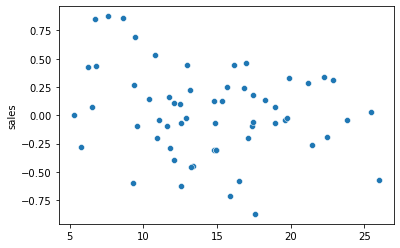

In [98]:
# Check the assumption
plt.figure()
sns.scatterplot(Y_pred,residuals)
plt.show()

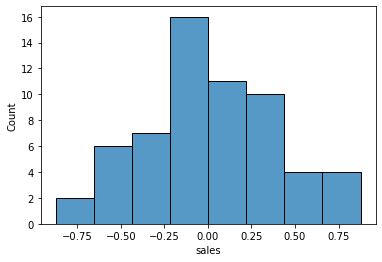

In [95]:
sns.histplot(residuals)
plt.show()

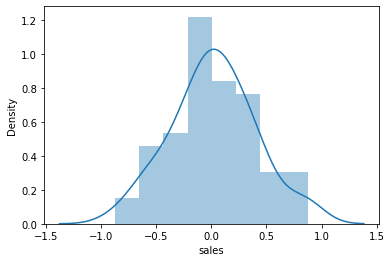

In [96]:
# Displot()
sns.distplot(residuals)
plt.show()

In [97]:
residuals.skew()

0.07135639589176812